<a href="https://colab.research.google.com/github/malihasama07/Python/blob/main/ireshDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [5]:
print(iris.data[:5])
print(iris.target[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [6]:
import pandas as pd

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [7]:
print(df.head(10))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0 

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [11]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [13]:
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [14]:
df = df.dropna()
df = df.fillna(df.mean(numeric_only=True))

In [15]:
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicates: 1


In [16]:
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [17]:
df = df.drop(columns=['target'])
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


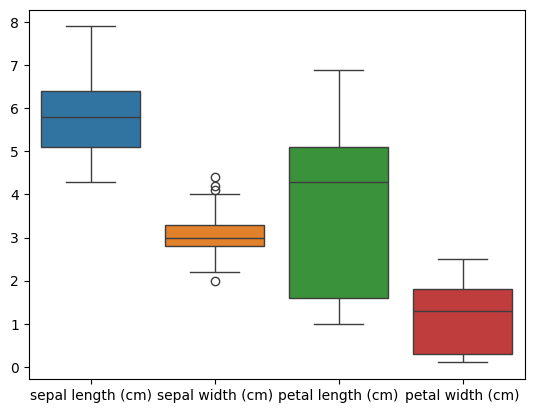

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df.drop(columns=['species']))
plt.show()


In [19]:
print(df.sample(5))
print(df.shape)


    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
28                5.2               3.4                1.4               0.2   
27                5.2               3.5                1.5               0.2   
43                5.0               3.5                1.6               0.6   
62                6.0               2.2                4.0               1.0   
49                5.0               3.3                1.4               0.2   

       species  
28      setosa  
27      setosa  
43      setosa  
62  versicolor  
49      setosa  
(149, 5)


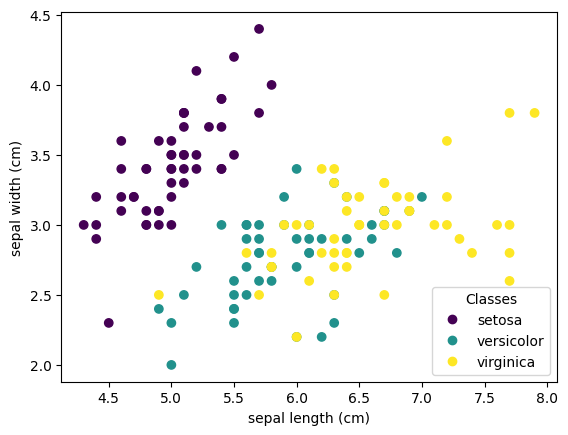

In [20]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [21]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [23]:
print(df.columns)
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']]
y = df['petal length (cm)']



Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')


In [24]:
print(df.columns.tolist())


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [28]:
y_pred = model.predict(X_test)


In [ ]:
# R-squared value
print("R² Score:", r2_score(y_test, y_pred))

# Mean Squared Error
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.9624665938425995
MSE: 0.11834866814413039


In [29]:
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(results.head(10))


     Actual  Predicted
73      4.7   4.122171
18      1.7   1.862769
117     6.7   6.050025
78      4.5   4.423004
76      4.8   4.909048
31      1.5   2.061790
64      3.6   3.848261
140     5.6   6.098920
68      4.5   5.028539
82      3.9   3.976338


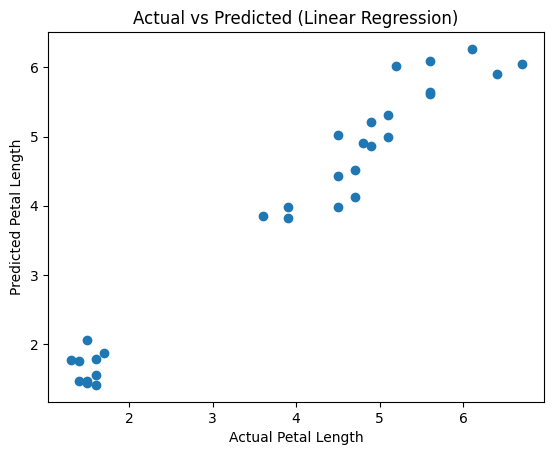

In [30]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Petal Length")
plt.ylabel("Predicted Petal Length")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()
